In [3]:
import os
os.chdir('data')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn.svm import LinearSVC, SVC

from IPython.display import Image

%matplotlib inline 

In [5]:
data_train_X = pd.read_csv('X_train_bac.csv').rename(columns={'Unnamed: 0': 'id'})
data_train_Y = pd.read_csv('y_train_bac.csv').rename(columns={'Unnamed: 0': 'id'})
data_test_X  = pd.read_csv('X_test_bac.csv').rename(columns={'Unnamed: 0': 'id'})

In [6]:
data_train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            11466 non-null  int64  
 1   num_airplane  11466 non-null  int64  
 2   sref          11466 non-null  float64
 3   velocity      11466 non-null  int64  
 4   alpha         11466 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 448.0 KB


In [7]:
data_train_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11466 non-null  int64  
 1   C_L     11466 non-null  float64
 2   C_D     11466 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 268.9 KB


# Обучаем определять C_L

In [8]:
train_X = data_train_X.drop(['id'], axis=1)
train_Y_cl = data_train_Y[['C_L']]

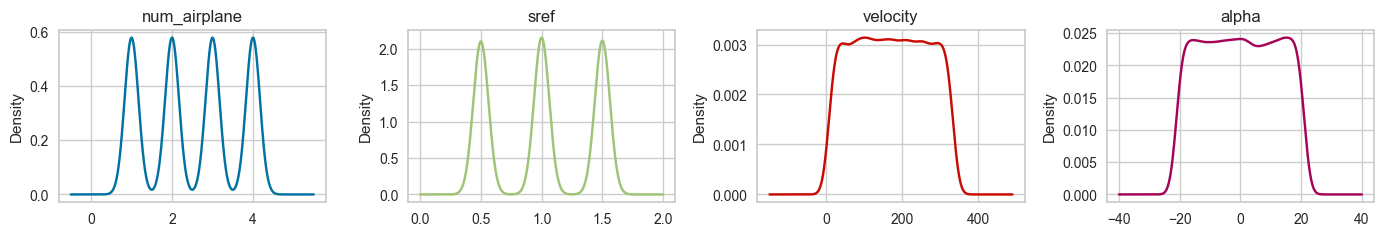

In [9]:
train_X.plot(kind='kde', subplots=True, layout=(6, 4), sharex=False, 
                         sharey=False, figsize=[14,13], legend = False,
                         title = train_X.columns.values.tolist())
plt.tight_layout()

In [10]:
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [19]:
train_data_cl = train_X.copy()
train_data_cl = (train_data_cl-train_data_cl.mean())/train_data_cl.std()
# train_data_cl=(train_data_cl-train_data_cl.min())/(train_data_cl.max()-train_data_cl.min())
train_data_cl['Y'] = train_Y_cl

In [20]:
train_data_cl

,num_airplane,sref,velocity,alpha,Y
0,-1.341660,-1.231134,-0.155065,0.494620,1.760871
1,1.341504,-0.001930,0.644960,0.659250,2.978144
2,-0.447272,1.227275,0.911636,1.317767,0.014019
3,-0.447272,-0.001930,0.751631,0.988508,0.146525
4,-0.447272,-0.001930,-1.275101,-1.645561,-0.021644
...,...,...,...,...,...
11461,-0.447272,1.227275,0.111610,0.823879,0.147974
11462,1.341504,-0.001930,-0.261735,0.988508,5.203279
11463,0.447116,1.227275,1.391651,-0.493156,-0.977631
11464,1.341504,-1.231134,0.164945,1.647026,21.068404


In [21]:
# from pycaret.classification import *
from pycaret.regression import *

In [22]:
setup(data = train_data_cl, target = 'Y', session_id=42, n_jobs=4)

In [23]:
best = compare_models()

In [24]:
print(best)

GradientBoostingRegressor(random_state=42)


In [25]:
# rf_model = create_model('xgboost', n_jobs=1)
best_model = create_model(best)
best_model_fin = finalize_model(best_model)

# Предсказываем C_L

In [35]:
test_data = data_test_X.copy().drop(['id'], axis=1)

In [36]:
predictions_cl = predict_model(best_model_fin, data=test_data)

# Обучаем определять C_D

In [69]:
train_X_cd = data_train_X.drop(['id'], axis=1)
train_Y_cd = data_train_Y[['C_D']]

train_data_cd = train_X_cd.copy()
train_data_cd['Y'] = train_Y_cd

from pycaret.regression import *
setup(data = train_data_cd, target = 'Y', session_id=42, n_jobs=4, normalize=True)

In [73]:
best_cd = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:24:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0966,0.0457,0.2128,0.4435,0.1285,2.2436,0.0240
lightgbm,Light Gradient Boosting Machine,0.0995,0.0481,0.2185,0.4167,0.1311,1.6923,0.0230
gbr,Gradient Boosting Regressor,0.1041,0.0496,0.2216,0.4045,0.1324,2.9270,0.0270
knn,K Neighbors Regressor,0.1059,0.0571,0.2385,0.3009,0.1440,1.4037,0.0250
rf,Random Forest Regressor,0.1092,0.0611,0.2465,0.2498,0.1484,1.4695,0.0560
lr,Linear Regression,0.1427,0.0731,0.2685,0.1306,0.1652,8.8814,0.0240
ridge,Ridge Regression,0.1427,0.0731,0.2685,0.1306,0.1652,8.8819,0.0230
lar,Least Angle Regression,0.1427,0.0731,0.2685,0.1306,0.1652,8.8814,0.0230
br,Bayesian Ridge,0.1426,0.0731,0.2685,0.1306,0.1652,8.8919,0.0270
ada,AdaBoost Regressor,0.1431,0.0709,0.2650,0.1234,0.1703,3.6220,0.0310


In [74]:
print(best_cd)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=4, num_parallel_tree=None, predictor=None,
             random_state=42, ...)


In [76]:
best_cd_model = create_model(best_cd)
best_cd_model_fin = finalize_model(best_cd_model)

In [77]:
test_data_cd = data_test_X.copy().drop(['id'], axis=1)
predictions_cd = predict_model(best_cd_model_fin, data=test_data_cd)

# Export results

In [79]:
data_results = pd.read_csv('sample_submission.csv').rename(columns={'Unnamed: 0': ''})
data_results['0'] = predictions_cl['prediction_label']
data_results['1'] = predictions_cd['prediction_label']
data_results.to_csv('test_predictions_1.csv', index=None)